<a href="https://colab.research.google.com/github/vithushanms/convolutional-neural-network-demo/blob/main/%5BCNNs%5D_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
from tensorflow.keras import datasets, utils

In [24]:
#using https://oreil.ly/cNbFG dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

print(f'shape of y_train: {y_train.shape}')
print(f'shape of x_train: {x_train.shape}')

print(f'shape of y_test: {y_test.shape}')
print(f'shape of x_test: {x_test.shape}')

shape of y_train: (50000, 1)
shape of x_train: (50000, 32, 32, 3)
shape of y_test: (10000, 1)
shape of x_test: (10000, 32, 32, 3)



The shape of x_train being (50000, 32, 32, 3) indicates that x_train is a 4-dimensional array representing the training images in the CIFAR-10 dataset.

Let's break down the dimensions:

- The first dimension (50000) represents the number of training  samples in the dataset.
- The second dimension (32) represents the height of each image in pixels.
- The third dimension (32) represents the width of each image in pixels.
- The fourth dimension (3) represents the number of color channels in each image. In this case, 3 stands for the Red, Green, and Blue (RGB) color channels.

In [25]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [26]:
#One hot encoding
NUM_CLASSES = 10

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)


In [27]:
print(f'shape of y_train: {y_train.shape}')
print(f'shape of x_train: {x_train.shape}')

print(f'shape of y_test: {y_test.shape}')
print(f'shape of x_test: {x_test.shape}')


shape of y_train: (50000, 10)
shape of x_train: (50000, 32, 32, 3)
shape of y_test: (10000, 10)
shape of x_test: (10000, 32, 32, 3)


## Building a basic model

In [28]:
from tensorflow.keras import layers, models

input_layer = layers.Input(shape=(32, 32, 3))
x = layers.Flatten()(input_layer)
x = layers.Dense(units=200, activation = 'relu')(x)
x = layers.Dense(units=150, activation = 'relu')(x)
output_layer = layers.Dense(units=10, activation = 'softmax')(x)
model = models.Model(input_layer, output_layer)

In [29]:
from tensorflow.keras import optimizers

opt = optimizers.Adam(learning_rate=0.0005) #using Adam (Adaptive Moment Estimation) instead of gradient decent
model.compile(loss='categorical_crossentropy', optimizer=opt,
              metrics=['accuracy'])

Adam vs Gradient Decent

- Adaptive Learning Rate: Adam dynamically adjusts the learning rate for each parameter based on its previous gradients. This adaptive behavior helps to handle different parameter scales and varying learning rates, making it less sensitive to the initial learning rate selection.

- Momentum: Adam incorporates momentum, which helps to accelerate the convergence by accumulating past gradients. It allows the algorithm to overcome areas with small or noisy gradients and to traverse flat regions more effectively.

- Efficient Memory Usage: Adam maintains an exponentially decaying average of past gradients and squared gradients. This memory-efficient feature allows it to store and use a limited history of gradients, making it well-suited for large-scale models with millions of parameters.

- Robustness to Sparse Gradients: Adam performs well even in scenarios where gradients are sparse or noisy. The adaptive learning rate and momentum components help overcome the challenges associated with sparse gradients, leading to better convergence.

In [30]:
model.fit(x_train
          , y_train
          , batch_size = 32
          , epochs = 10
          , shuffle = True
          )

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.8479 - accuracy: 0.3350
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6604 - accuracy: 0.4086
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5849 - accuracy: 0.4361
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5320 - accuracy: 0.4547
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4950 - accuracy: 0.4663
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4622 - accuracy: 0.4820
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4366 - accuracy: 0.4895
Epoch 8/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.4132 - accuracy: 0.4960
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3903 - accuracy: 0.5057
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.368

In [31]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 1.4487 - accuracy: 0.4895


[1.4486634731292725, 0.4894999861717224]

In [32]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog'
                   , 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

313/313 [==============================] - 0s 1ms/step


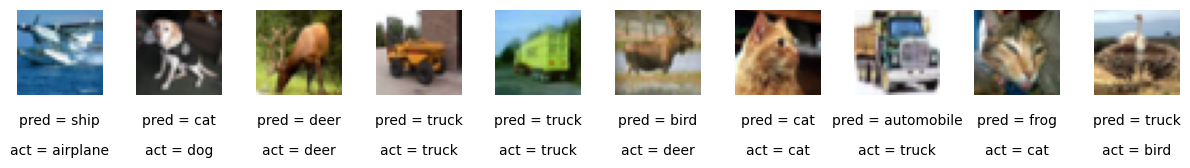

In [33]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10
       , ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10
        , ha='center', transform=ax.transAxes)
    ax.imshow(img)

## Adding convolutional layer

A convolutional layer is simply a collection of filters, where the values stored in the filters are the weights that are learned by the neural network through training. Initially these are random, but gradually the filters adapt their weights to start picking out interesting features such as edges or particular color combinations.

In [34]:
# An example in keras
input_layer = layers.Input(shape=(64,64,1))
conv_layer_1 = layers.Conv2D(
    filters = 2
    , kernel_size = (3,3)
    , strides = 1 #used to move the filters across the input, when we increase this reduces the size of output tensor and increase the number of channels
    , padding = "same" # to control the padding with zero of the edges in the input. "same" will pad with zeros in a way that output dimension is same as input
    )(input_layer)

The shape of the output from a convolutional layer with padding = "same" is:

(input_height/strides, input_width/strides, number_of_filters)

In [35]:
# stack up convolution layers infront of the flatter layer

input_layer = layers.Input(shape=(32,32,3))
conv_layer_1 = layers.Conv2D(
    filters = 10
    , kernel_size = (4,4)
    , strides = 2
    , padding = 'same'
    )(input_layer)

# The shape of each of the 10 filters in the first convolutional layer is 4 × 4 × 3. 
# This is because we have chosen each filter to have a height and width of 4 (kernel_size = (4,4)) 
# and there are three channels in the preceding layer (red, green, and blue). Therefore, the number of parameters (or weights) 
# in the layer is (4 × 4 × 3 + 1) × 10 = 490, where the + 1 is due to the inclusion of a bias term attached to each of the filters. 
# The output from each filter will be the pixelwise multiplication of the filter weights 
# and the 4 × 4 × 3 section of the image it is covering. As strides = 2 and padding = "same", 
# the width and height of the output are both halved to 16, and since there are 10 filters the output 
# of the first layer is a batch of tensors each having shape [16, 16, 10].

conv_layer_2 = layers.Conv2D(
    filters = 20
    , kernel_size = (3,3)
    , strides = 2
    , padding = 'same'
    )(conv_layer_1)
flatten_layer = layers.Flatten()(conv_layer_2)
output_layer = layers.Dense(units=10, activation = 'softmax')(flatten_layer)
model = models.Model(input_layer, output_layer)

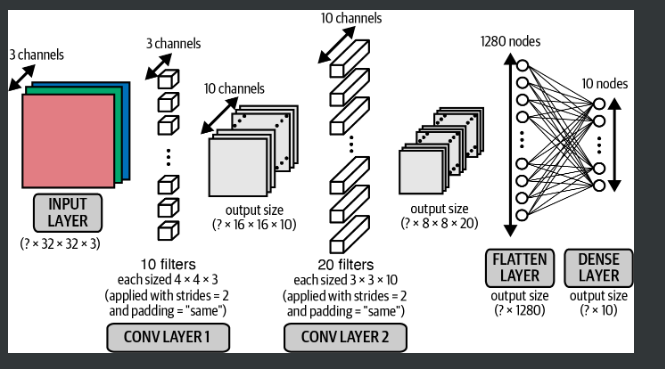

In [36]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 10)        490       
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 20)          1820      
                                                                 
 flatten_3 (Flatten)         (None, 1280)              0         
                                                                 
 dense_8 (Dense)             (None, 10)                12810     
                                                                 
Total params: 15120 (59.06 KB)
Trainable params: 15120 (59.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
#adding a batchnorm layer
layers.BatchNormalization(momentum = 0.9)

In [38]:
input_layer = layers.Input((32,32,3))

x = layers.Conv2D(filters = 32, kernel_size = 3
	, strides = 1, padding = 'same')(input_layer)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Flatten()(x)

x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Dropout(rate = 0.5)(x)

output_layer = layers.Dense(10, activation = 'softmax')(x)

model = models.Model(input_layer, output_layer)

In [39]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_6 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_7 (Bat  (None, 16, 16, 32)        128       
 chNormalization)                                          

In [40]:
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt,
              metrics=['accuracy'])

In [41]:
# train with CIFAR-10 Dataset
model.fit(x_train
          , y_train
          , batch_size = 32
          , epochs = 10
          , shuffle = True
          )

Epoch 1/10
1563/1563 [==============================] - 31s 19ms/step - loss: 1.5497 - accuracy: 0.4545
Epoch 2/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.1385 - accuracy: 0.5987
Epoch 3/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9953 - accuracy: 0.6513
Epoch 4/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.9155 - accuracy: 0.6816
Epoch 5/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.8503 - accuracy: 0.7030
Epoch 6/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8023 - accuracy: 0.7202
Epoch 7/10
1563/1563 [==============================] - 24s 16ms/step - loss: 0.7600 - accuracy: 0.7359
Epoch 8/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.7175 - accuracy: 0.7500
Epoch 9/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.6811 - accuracy: 0.7609
Epoch 10/10
1563/1563 [==============================] - 25s 16m

In [42]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.7996 - accuracy: 0.7265


[0.7996346950531006, 0.7264999747276306]

We can see that the accuracy has increased with a set of convolutional layers. 

In [43]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog'
                   , 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

313/313 [==============================] - 2s 5ms/step


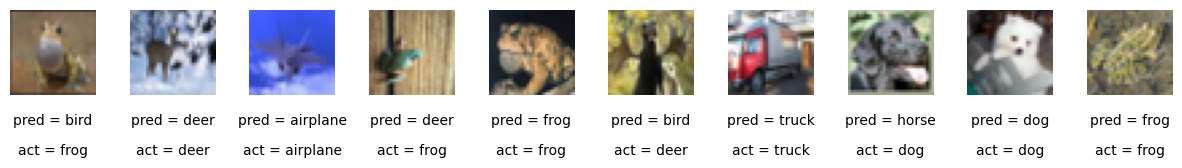

In [44]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10
       , ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10
        , ha='center', transform=ax.transAxes)
    ax.imshow(img)